## Capstone II EDA and Data Stories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\pablo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_pickle('capstone2_final')

### Data Overview

In [4]:
df.shape

(45077, 98)

In [ ]:
df.info()

The dataframe records cover 97 attributes derived from:
25,077 benign urls
10,000 phishing urls
10,000 malicious urls

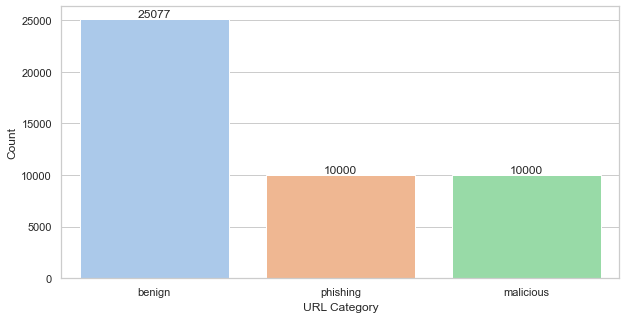

In [41]:
#Use seaborn's countplot to plot categorical variable
sns.set(rc={'figure.figsize':(10, 5)}, style="whitegrid")
sns.set_palette(sns.color_palette("pastel"))

splot = sns.countplot(df.category)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords= 'offset points')
plt.ylabel('Count', fontsize=12)
plt.xlabel('URL Category', fontsize=12)
plt.show()   

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
category,45077,3,benign,25077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
len_url,45077,NaN,NaN,NaN,61.7277,53.5323,12,34,47,71,1386
is_53,45077,NaN,NaN,NaN,0.600528,0.489795,0,0,1,1,1
is_54_75,45077,NaN,NaN,NaN,0.171684,0.37711,0,0,0,0,1
is_76,45077,NaN,NaN,NaN,0.227788,0.41941,0,0,0,0,1
len_tokenized_url,45077,NaN,NaN,NaN,17.5964,13.7471,5,11,15,19,407
avg_token_len,45077,NaN,NaN,NaN,3.48898,1.18335,1.61127,2.85714,3.28571,3.875,43.9167
last_slashes,45077,NaN,NaN,NaN,5.88613,11.7592,5,5,5,6,783
loc_last_slashes,45077,NaN,NaN,NaN,0.119957,0.0683366,0.00573614,0.0769231,0.113636,0.151515,0.978495
n_let,45077,NaN,NaN,NaN,42.5421,38.4685,4,23,33,50,1012


In [ ]:
is_benign = df['category'] == 'benign'
df_benign = df[is_benign]
df_benign.describe().T

In [ ]:
is_phishing = df['category'] == 'phishing'
df_phishing = df[is_phishing]
df_phishing.describe().T

In [ ]:
is_malicious = df['category'] == 'malicious'
df_malicious = df[is_malicious]
df_malicious.describe().T

### URL String Features

How do url strings differ between benign, phishing and malicious url categories?
Analyze the following feaatures:
1. Length
2. Type of characters
3. Uppercase versus lowercase letters
4. Entropy
5. Masques
6. Character continuity rates
7. Number of tokens, average length

In [29]:
df_table = df.groupby('category')
df_table.describe()[['len_url', 'pc_let', 'pc_num', 'pc_spec', 'pc_uppercase', 'entropy', 'n_masques', 'char_cont_rate', 'len_tokenized_url', 'avg_token_len']].T

category                       benign     malicious      phishing
len_url           count  25077.000000  10000.000000  10000.000000
                  mean      57.457272     44.972900     89.191300
                  std       38.320570     21.776009     87.641618
                  min       12.000000     17.000000     15.000000
                  25%       36.000000     33.000000     40.000000
                  50%       47.000000     35.000000     66.000000
                  75%       66.000000     53.000000     99.000000
                  max      972.000000    493.000000   1386.000000
pc_let            count  25077.000000  10000.000000  10000.000000
                  mean       0.718089      0.504964      0.735571
                  std        0.112145      0.233785      0.105865
                  min        0.326923      0.133333      0.150943
                  25%        0.666667      0.272727      0.671845
                  50%        0.742857      0.456522      0.769231
                  75%        0.804348      0.754386      0.813953
                  max        0.903614      0.922078      0.962121
pc_num            count  25077.000000  10000.000000  10000.000000
                  mean       0.088262      0.270733      0.096079
                  std        0.104685      0.189345      0.114281
                  min        0.000000      0.000000      0.000000
                  25%        0.000000      0.075000      0.000000
                  50%        0.065217      0.310345      0.048544
                  75%        0.132450      0.454545      0.174862
                  max        0.609589      0.634146      0.760793
pc_spec           count  25077.000000  10000.000000  10000.000000
                  mean       0.193649      0.224304      0.168350
                  std        0.034149      0.054575      0.046811
                  min        0.028892      0.026369      0.017078
                  25%        0.170732      0.176471      0.139535
                  50%        0.191176      0.239130      0.171429
                  75%        0.214286      0.272727      0.195122
                  max        0.454545      0.360000      0.368421
pc_uppercase      count  25077.000000  10000.000000  10000.000000
                  mean       0.018055      0.082481      0.051655
                  std        0.072470      0.095041      0.110615
                  min        0.000000      0.000000      0.000000
                  25%        0.000000      0.000000      0.000000
                  50%        0.000000      0.083000      0.000000
                  75%        0.000000      0.111000      0.039000
                  max        0.910000      0.722000      0.750000
entropy           count  25077.000000  10000.000000  10000.000000
                  mean       2.274517      2.016632      2.673445
                  std        0.627818      0.458143      0.827931
                  min        0.480878      0.528321      0.480878
                  25%        1.816882      1.726410      2.082142
                  50%        2.221747      1.905946      2.713578
                  75%        2.650682      2.242455      3.120289
                  max        5.498002      5.068459      5.653895
n_masques         count  25077.000000  10000.000000  10000.000000
                  mean       0.119552      0.347500      1.764300
                  std        1.415730      1.170163      5.530877
                  min        0.000000      0.000000      0.000000
                  25%        0.000000      0.000000      0.000000
                  50%        0.000000      0.000000      0.000000
                  75%        0.000000      0.000000      1.000000
                  max       80.000000     35.000000     91.000000
char_cont_rate    count  25077.000000  10000.000000  10000.000000
                  mean       0.326969      0.344122      0.298998
                  std        0.126076      0.074014      0.143721
                  min        0.036530   

Mean Scores:

| Feature | Entire Dataset | Benign URLs | Phishing URLs | Malicious URLs |
| :-- | --: | --: | --: | --: |
| URL Length | 61.727 | 57.457 | 89.191 | 44.972 | 
| Percent Letters | 0.674 | 0.718 | 0.735 | .504 | 
| Percent Numbers | 0.130 | 0.088 | 0.096| 0.270|
| Percent Special Characters | 0.194 | 0.193 | 0.168 | 0.224 |
| Percent Uppercase | 0.039 | 0.018 | 0.051 | 0.082| 
| Entropy | 2.305 | 2.274 | 2.673 | 2.016 |
| Masque count | 0.534 | .119 | 1.764 | 0.347 |
| Character Continuity Rate | 0.324 | .3269 | 0.298 | 0.344 |
| Number of tokens | 17.596 | 17.401 | 20.815 | 14.865 |
| Average Token length | 3.488 | 3.401 | 4.182 | 3.014 |

Analysis Findings:

The table above reflects mean scores across all cateogires as well as the entire dataset. The dataset has a greater proportion of benign urls versus phishing and malicious urls. Thus, the mean scores of the entire dataset are not indicative of values we'd return with a more balanced data set.

Malicious URLS - Approximately 50% of the malicious urls in our dataset have an ip address in lieu of a domain name. This accounts for some of the notable differences in malicious url statistics, in comparison to the other categories. For example, on average, only 50% of the malicious url consists of letters, versus 71 and 73 percent for benign and phishing urls. As reflected above, malicious urls are, on average, shorter in length and have shorter token lengths.  

Phishing URLs - The mean url length score is 89.191 in comparison to 57.457 for benign urls, and 44.972 for malicious urls. Thus, it's not surprising that phishing urls have the highest average number of tokens (20.815 versus 17.401 and 14.865) and longest average token length of 4.182 (versus 3.401 and 3.014). They also have the highest average entropy score and highest average masque count. 

#### Charts

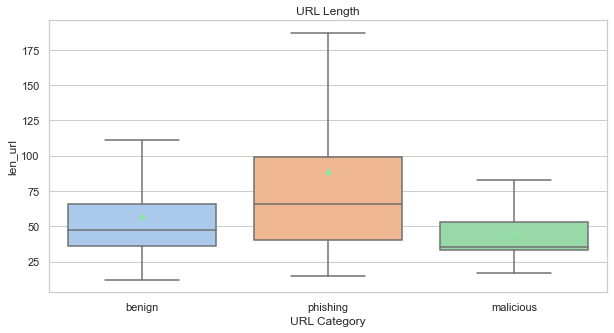

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
#df = sns.load_dataset("df")
sns.set_palette(sns.color_palette("pastel"))

ax = sns.boxplot(x="category", y="len_url", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('URL Length')

plt.show()

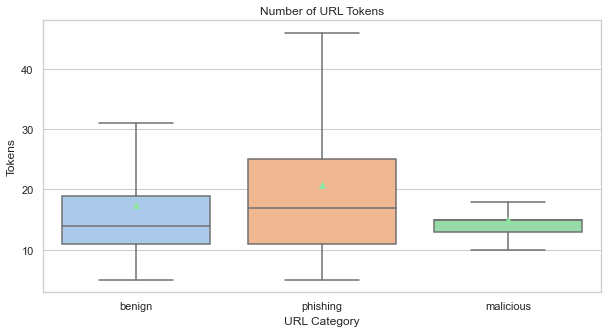

In [9]:
ax = sns.boxplot(x="category", y="len_tokenized_url", data=df, showfliers = False, showmeans = True )
plt.ylabel('Tokens')
plt.xlabel('URL Category')
plt.title('Number of URL Tokens')
plt.show()

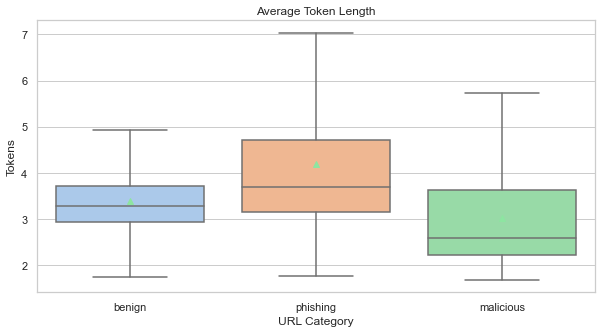

In [10]:
ax = sns.boxplot(x="category", y="avg_token_len", data=df, showfliers = False, showmeans = True )
plt.ylabel('Tokens')
plt.xlabel('URL Category')
plt.title('Average Token Length')

plt.show()

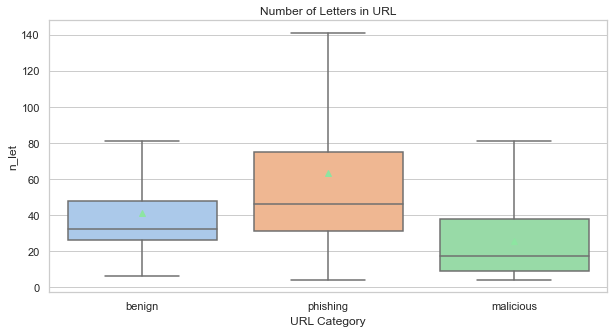

In [11]:
ax = sns.boxplot(x="category", y="n_let", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Letters in URL')

plt.show()

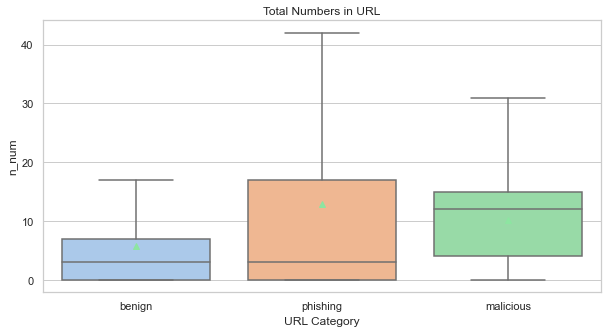

In [12]:
ax = sns.boxplot(x="category", y="n_num", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Total Numbers in URL')

plt.show()

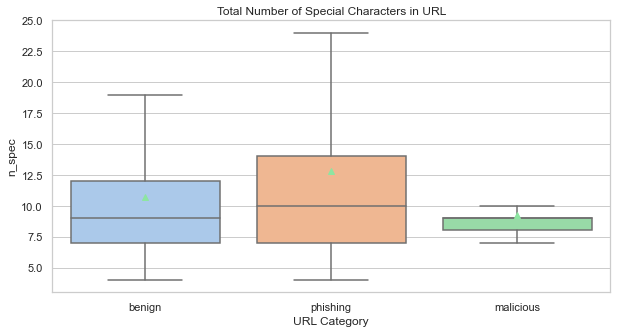

In [13]:
ax = sns.boxplot(x="category", y="n_spec", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Total Number of Special Characters in URL')

plt.show()

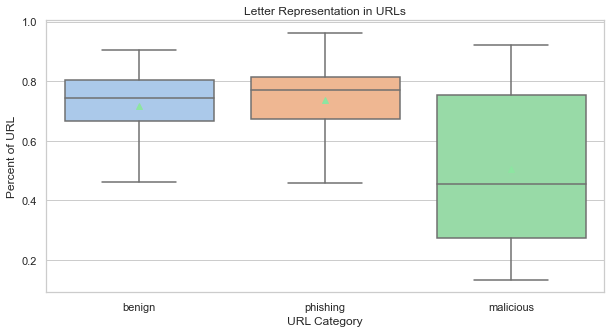

In [14]:
ax = sns.boxplot(x="category", y="pc_let", data=df, showfliers = False, showmeans = True )
plt.ylabel('Percent of URL')
plt.xlabel('URL Category')
plt.title('Letter Representation in URLs')

plt.show()

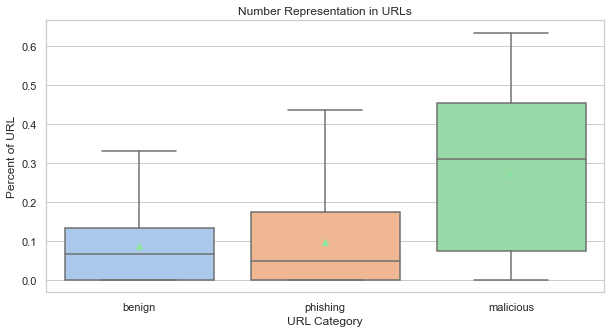

In [15]:
ax = sns.boxplot(x="category", y="pc_num", data=df, showfliers = False, showmeans = True )
plt.ylabel('Percent of URL')
plt.xlabel('URL Category')
plt.title('Number Representation in URLs')

plt.show()

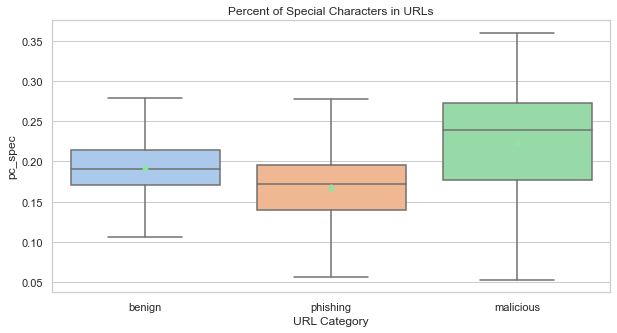

In [16]:
ax = sns.boxplot(x="category", y="pc_spec", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Special Characters in URLs')

plt.show()

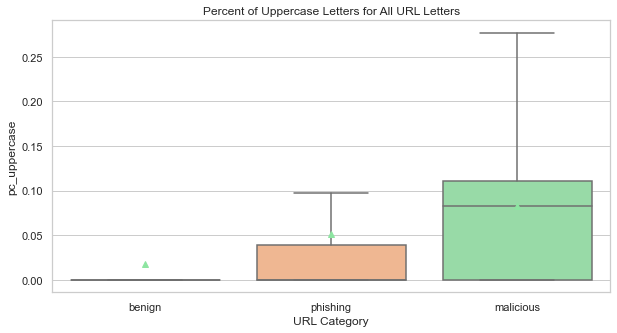

In [18]:
ax = sns.boxplot(x="category", y="pc_uppercase", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Uppercase Letters for All URL Letters')

plt.show()

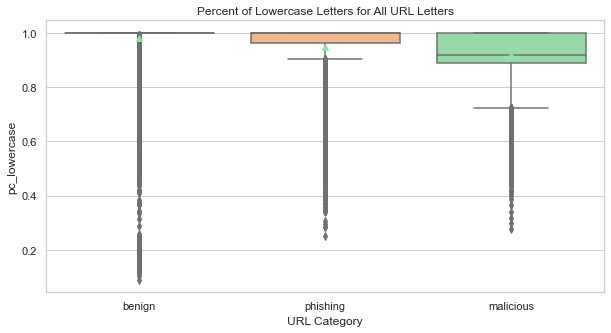

In [19]:
ax = sns.boxplot(x="category", y="pc_lowercase", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Lowercase Letters for All URL Letters')

plt.show()

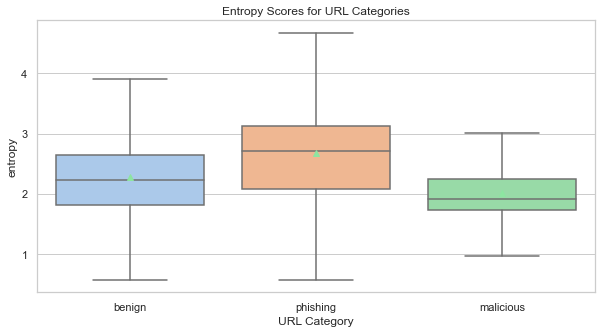

In [20]:
ax = sns.boxplot(x="category", y="entropy", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Entropy Scores for URL Categories')

plt.show()

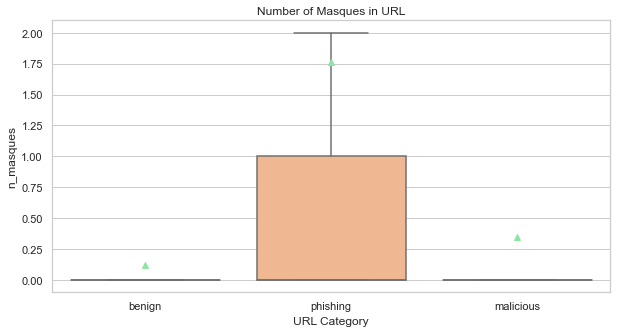

In [21]:
ax = sns.boxplot(x="category", y='n_masques', data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Masques in URL')

plt.show()

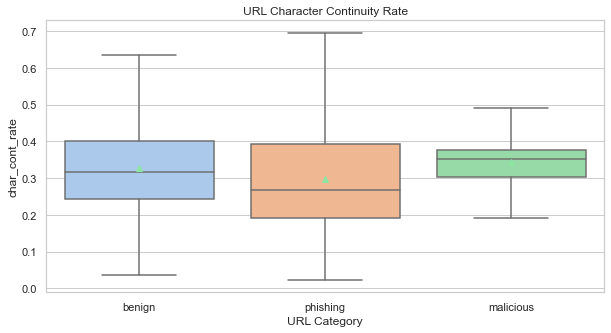

In [22]:
ax = sns.boxplot(x="category", y="char_cont_rate", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('URL Character Continuity Rate')

plt.show()

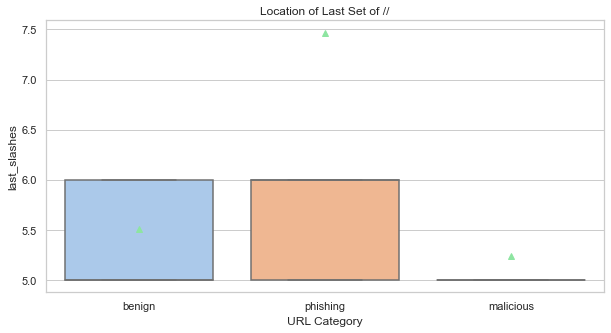

In [24]:
ax = sns.boxplot(x="category", y="last_slashes", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Location of Last Set of //')

plt.show()

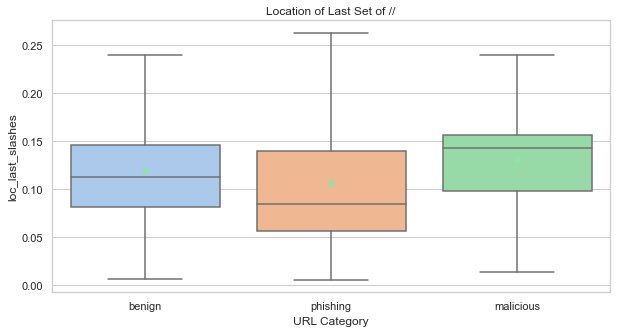

In [25]:
ax = sns.boxplot(x="category", y="loc_last_slashes", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Location of Last Set of //')

plt.show()

### Registered Domain Features

In [ ]:
This section covers the registered domain extracted from the url's netloc section. 
How do these domain strings differ between benign, phishing and malicious categories?

Analyze the following feaatures:
1. Length
2. Type of Characters
3. Entropy
4. Masques
5. Number of tokens, average length
6. IP and Alexa Top 500 status

In [34]:
df_table = df.groupby('category')
df_table.describe()[['len_domain', 'pc_domain_let', 'pc_domain_num', 'pc_domain_spec', 'domain_entropy', 'n_domain_masques', 'n_domain_tok', 'avg_domain_tok_len', 'is_top500_domain', 'is_ip']].T

category                        benign     malicious      phishing
len_domain         count  25077.000000  10000.000000  10000.000000
                   mean      11.066595     13.751800     14.422500
                   std        4.404816      3.385106      5.916527
                   min        4.000000      5.000000      4.000000
                   25%        9.000000     12.000000     10.000000
                   50%       11.000000     13.000000     13.000000
                   75%       12.000000     14.000000     17.000000
                   max      123.000000     40.000000     60.000000
pc_domain_let      count  25077.000000  10000.000000  10000.000000
                   mean       0.868821      0.407582      0.872924
                   std        0.086455      0.449252      0.129594
                   min        0.222222      0.000000      0.000000
                   25%        0.857143      0.000000      0.857143
                   50%        0.888889      0.000000      0.909091
                   75%        0.916667      0.909091      0.928571
                   max        0.965517      0.970588      0.983333
pc_domain_num      count  25077.000000  10000.000000  10000.000000
                   mean       0.016577      0.426887      0.024107
                   std        0.073884      0.378523      0.105283
                   min        0.000000      0.000000      0.000000
                   25%        0.000000      0.000000      0.000000
                   50%        0.000000      0.727273      0.000000
                   75%        0.000000      0.769231      0.000000
                   max        0.638889      0.800000      0.866667
pc_domain_spec     count  25077.000000  10000.000000  10000.000000
                   mean       0.114602      0.165531      0.102969
                   std        0.037795      0.076238      0.053298
                   min        0.034483      0.027027      0.016667
                   25%        0.083333      0.086957      0.066667
                   50%        0.111111      0.200000      0.090909
                   75%        0.133333      0.230769      0.125000
                   max        0.352941      0.375000      0.333333
domain_entropy     count  25077.000000  10000.000000  10000.000000
                   mean       0.576910      1.072452      0.778389
                   std        0.384023      0.438184      0.512229
                   min        0.000000      0.000000      0.000000
                   25%        0.332193      0.796578      0.375000
                   50%        0.482206      1.160401      0.761663
                   75%        0.796578      1.400203      1.097494
                   max        3.314790      2.236819      2.724381
n_domain_masques   count  25077.000000  10000.000000  10000.000000
                   mean       0.009730      0.019300      0.017100
                   std        0.102533      0.187433      0.173236
                   min        0.000000      0.000000      0.000000
                   25%        0.000000      0.000000      0.000000
                   50%        0.000000      0.000000      0.000000
                   75%        0.000000      0.000000      0.000000
                   max        2.000000      4.000000      6.000000
n_domain_tok       count  25077.000000  10000.000000  10000.000000
                   mean       2.171352      3.132400      2.109700
                   std        0.376824      0.970755      0.357601
                   min        2.000000      2.000000      2.000000
                   25%        2.000000      2.000000      2.000000
                   50%        2.000000      4.000000      2.000000
                   75%        2.000000      4.000000      2.000000
                   max        3.000000      4.000000      4.000000
avg_domain_tok_len count  25077.000000  10000.000000  10000.000000
                   mean       5.179514      4.966100      6.919300
                   std        2.197687      2.4

Analysis Summary:

Mean Scores:    

| Feature | Entire Dataset | Benign URLs | Phishing URLs | Malicious URLs |
| :-- | --: | --: | --: | --: |
| Domain Length | 12.406 | 11.066 | 14.422 | 13.751 |
| Percent Letters | 0.767 | 0.868 | 0.872 | 0.407 |
| Percent Numbers | 0.109 | 0.016 | 0.024 | 0.426 | 
| Percent Special Characters | 1.457 | 0.114 | 0.102 | 0.165 |
| Entropy | 0.731 | 0.576 | 0.778 | 1.072 | 
| Masque count | 0.013 | 0.009 | 0.017 | 0.019 |
| Number of tokens | 2.370 | 2.171 | 2.109 | 3.132 |
| Average Token length | 5.518 | 5.179 | 6.919 | 4.966 |
| Domains in Alexa Top 500 | 0.146 | 0.235 | .044 | .025 |
| Is Domain an IP | 0.124 | .0000 | 0.546 | 0.015 |

Analaysis Findings:

Malicious URLs - Approximately 54% of the records in this category have an IP address, not a registered domain name. These IP values were included in all feature calculations as part of the 'domain' section. Malicious domains are on average shorter than phishing domains, but longer than benign domains. This cateogry had the highest entropy score of 1.072, in comparison to .576 for benign and .778 for phishing domains.

Phishing URLS - Phishing domains are longer on average, with a longer token length. 
    
Benign URLs - In comparison with the phishing and malicious domains, benign domains have shorter lengths overall, the lowest entropy score, a greater propensity to be on the Alexa Top 500 website list. They are the least likely url type to contain an IP address.

#### Charts

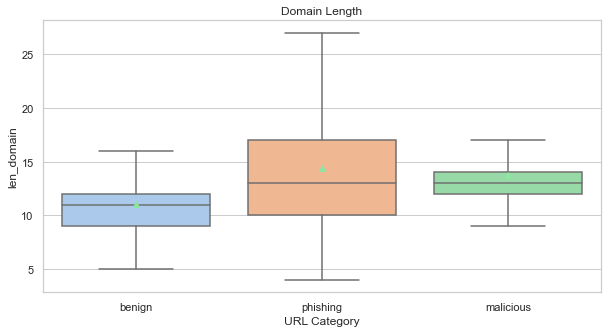

In [26]:
ax = sns.boxplot(x="category", y="len_domain", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Domain Length')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_domain_tok", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Domain Tokens')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="avg_domain_tok_len", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Average Domain Token Length')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_domain_let", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Letters in Domain')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_domain_num", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Numbers in Domain')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_domain_spec", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Special Characters in Domain')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_domain_let", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Letters in Domain')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_domain_num", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Numbers in Domain')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_domain_spec", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Special Characters in Domain')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="domain_entropy", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Domain Entropy Scores')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_domain_masques", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Domain Masques')

plt.show()

In [ ]:
IS_IP = df.groupby('category').is_ip.value_counts(normalize=True)
IS_IP.unstack().plot(kind='bar').set_title("Percent of IP Address 'Domains'")
plt.legend(loc='upper right')
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
IS_IP = df.groupby('category').is_top500_domain.value_counts(normalize=True)
IS_IP.unstack().plot(kind='bar').set_title("Percent of Domains In Alexa Top 500")
plt.legend(loc='upper right')
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_subdomains", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Subdomains')

plt.show()

### Netloc Features

Previously, we reviewed the registered domain which was extracted from the url's netloc section.
Next we'll compare the netloc section across all categories.

A url's netloc section includes subdomains, second-level and top-level domains.

Analyze the following feaatures:
1. Length
2. Type of Characters
3. Entropy
4. Masques
5. Number of tokens, average length
6. Number of subdomains and top level domains

In [38]:
df_table = df.groupby('category')

df_table.describe()[['len_netloc', 'pc_netloc_let', 'pc_netloc_num', 'pc_netloc_spec', 'netloc_entropy', 'n_netloc_masques', 'n_netloc_tok', 'avg_netloc_tok_len', 'n_subdomains', 'n_domain_suffix']].T

category                        benign     malicious      phishing
len_netloc         count  25077.000000  10000.000000  10000.000000
                   mean      13.557603     18.071500     22.598900
                   std        5.932357      9.216164     11.325928
                   min        4.000000      6.000000      4.000000
                   25%       10.000000     14.000000     15.000000
                   50%       13.000000     18.000000     21.000000
                   75%       16.000000     20.000000     27.000000
                   max      132.000000    138.000000    150.000000
pc_netloc_let      count  25077.000000  10000.000000  10000.000000
                   mean       0.857501      0.402400      0.849927
                   std        0.070874      0.443953      0.136985
                   min        0.285714      0.000000      0.000000
                   25%        0.833333      0.000000      0.842105
                   50%        0.875000      0.000000      0.882353
                   75%        0.900000      0.900000      0.921053
                   max        0.965517      0.970588      0.983333
pc_netloc_num      count  25077.000000  10000.000000  10000.000000
                   mean       0.012388      0.436117      0.042417
                   std        0.053198      0.383673      0.118033
                   min        0.000000      0.000000      0.000000
                   25%        0.000000      0.000000      0.000000
                   50%        0.000000      0.750000      0.000000
                   75%        0.000000      0.789474      0.000000
                   max        0.571429      0.809524      0.800000
pc_netloc_spec     count  25077.000000  10000.000000  10000.000000
                   mean       0.130111      0.161483      0.107656
                   std        0.038824      0.066269      0.042503
                   min        0.034483      0.027027      0.016667
                   25%        0.100000      0.090909      0.074074
                   50%        0.125000      0.200000      0.100000
                   75%        0.153846      0.214286      0.138889
                   max        0.300000      0.375000      0.333333
netloc_entropy     count  25077.000000  10000.000000  10000.000000
                   mean       0.855688      1.320844      1.348002
                   std        0.448638      0.503076      0.612578
                   min        0.000000      0.000000      0.000000
                   25%        0.482206      1.058834      0.943481
                   50%        0.853948      1.400203      1.354500
                   75%        1.174930      1.631078      1.785439
                   max        3.458474      3.607353      3.891888
n_netloc_masques   count  25077.000000  10000.000000  10000.000000
                   mean       0.009850      0.021800      0.056900
                   std        0.103104      0.195777      0.342745
                   min        0.000000      0.000000      0.000000
                   25%        0.000000      0.000000      0.000000
                   50%        0.000000      0.000000      0.000000
                   75%        0.000000      0.000000      0.000000
                   max        2.000000      4.000000      7.000000
n_netloc_tok       count  25077.000000  10000.000000  10000.000000
                   mean       2.677753      3.363600      2.966200
                   std        0.646873      0.988581      1.020177
                   min        2.000000      2.000000      2.000000
                   25%        2.000000      2.000000      2.000000
                   50%        3.000000      4.000000      3.000000
                   75%        3.000000      4.000000      3.000000
                   max        8.000000     12.000000     12.000000
avg_netloc_tok_len count  25077.000000  10000.000000  10000.000000
                   mean       5.107153      5.629368      7.705762
                   std        1.949128      2.2

Analysis Summary:

Mean Scores:    

| Feature | Entire Dataset | Benign URLs | Phishing URLs | Malicious URLs |
| :-- | --: | --: | --: | --: |
| Netloc Length | 16.564 | 13.557 | 22.598 | 18.071 |
| Percent Letters | 0.754 | 0.857 | 0.849 | 0.402 |
| Percent Numbers | 0.113 | 0.012 | 0.042 | 0.436 |
| Percent Special Characters | 0.132 | 0.130 | 0.107 | 0.161 |
| Entropy | 1.068 | 0.855 | 1.348 | 1.320 |
| Masque Count | 0.022 | 0.009 | 0.056 | 0.021 |
| Number of Tokens | 2.893 | 2.677 | 2.966 | 3.363 |
| Average Token length | 5.799 | 5.107 | 7.705 | 5.629 |
| Number of Subdomains | 0.523 | 0.506 | 0.856 | 0.231 |
| Number of Top-Level Domains | 0.991 | 1.159 | 1.064 | 0.494 |

Analysis Findings:

Malicious URLS - For the malicious url category, this section is on average longer than benign urls and shorter than phishing urls (18.07 characters versus 13.55 for benign and 22.59 for phishing). The entropy score of 1.32 is similar to phishing's score of 1.34, but greater than benign urls' score of .85.

Phishing URLs - The phishing cateogry trumps the others again, with it's high length scores. This cateogry is also most likely to have one or more subdomains.

Benign URLs - The benign netloc section has the lowest mean score for length (13.55 in comparison to phishing's 22.59 and malicious' 18.07). It has the lowest mean entropy and masque scores, lowest mean number of tokens, and shortest average token length. Subdomains are more common in benign urls than malicious urls.  

#### Charts

In [ ]:
ax = sns.boxplot(x="category", y="len_netloc", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Length of URL Netloc Section')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_netloc_tok", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Netloc Tokens')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="avg_netloc_tok_len", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Average Netloc Token Length')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_netloc_let", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Letters in Netloc')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_netloc_num", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Numbers in Netloc')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_netloc_spec", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Special Characters in Netloc')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_netloc_let", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Letters in Netloc')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_netloc_num", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Numbers in Netloc')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_netloc_spec", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Special Characters in Netloc')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="netloc_entropy", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Netloc Entropy')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_netloc_masques", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Netloc Masques')

plt.show()

### Path Features

How does the path section differ between benign, phishing and malicious categories?
Analyze the following feaatures:
1. Length
2. Type of Characters
3. Uppercase versus Lowercase letters
4. Entropy
5. Masques
6. Number of single character paths
7. Length of shortest and longest paths
8. Number of path items, and average length

In [37]:
df_table = df.groupby('category')

df_table.describe()[['len_all_paths', 'pc_path_let', 'pc_path_num', 'pc_path_spec', 'path_entropy', 'n_path_masques', 'n_path_items', 'avg_path_token_len', 'n_single_char_path', 'shortest_path_len', 'longest_path_len']].T

category                        benign     malicious      phishing
len_all_paths      count  25077.000000  10000.000000  10000.000000
                   mean      36.467520     18.294200     30.266700
                   std       38.213096     17.612725     33.278875
                   min        0.000000      0.000000      0.000000
                   25%       16.000000      7.000000      7.000000
                   50%       25.000000     12.000000     22.000000
                   75%       45.000000     25.000000     43.000000
                   max      947.000000    248.000000    631.000000
pc_path_let        count  25077.000000  10000.000000  10000.000000
                   mean       0.646215      0.690507      0.583477
                   std        0.235953      0.126447      0.315743
                   min        0.000000      0.000000      0.000000
                   25%        0.545455      0.666667      0.418605
                   50%        0.714286      0.714286      0.750000
                   75%        0.824742      0.764706      0.818182
                   max        0.964286      0.947368      0.990291
pc_path_num        count  25077.000000  10000.000000  10000.000000
                   mean       0.143113      0.076822      0.087231
                   std        0.181308      0.127540      0.154555
                   min        0.000000      0.000000      0.000000
                   25%        0.000000      0.000000      0.000000
                   50%        0.083333      0.000000      0.000000
                   75%        0.228571      0.125000      0.105263
                   max        0.954545      0.842105      0.923077
pc_path_spec       count  25077.000000  10000.000000  10000.000000
                   mean       0.162021      0.232371      0.293392
                   std        0.065917      0.104461      0.307716
                   min        0.000000      0.000000      0.000000
                   25%        0.134615      0.158376      0.138329
                   50%        0.160000      0.214286      0.170732
                   75%        0.187500      0.285714      0.238095
                   max        1.000000      1.000000      1.000000
path_entropy       count  25077.000000  10000.000000  10000.000000
                   mean       1.529120      0.722434      1.334180
                   std        0.939673      0.790359      1.046211
                   min        0.000000      0.000000      0.000000
                   25%        0.789037      0.000000      0.332193
                   50%        1.446289      0.541311      1.326034
                   75%        2.159206      1.269400      2.245354
                   max        5.480675      4.515910      5.429061
n_path_masques     count  25077.000000  10000.000000  10000.000000
                   mean       0.109702      0.257100      0.468500
                   std        1.412735      0.913938      2.098868
                   min        0.000000      0.000000      0.000000
                   25%        0.000000      0.000000      0.000000
                   50%        0.000000      0.000000      0.000000
                   75%        0.000000      0.000000      0.000000
                   max       80.000000     22.000000     91.000000
n_path_items       count  25077.000000  10000.000000  10000.000000
                   mean       2.268214      1.816000      2.473200
                   std        1.367011      1.167939      2.172407
                   min        0.000000      0.000000      0.000000
                   25%        1.000000      1.000000      1.000000
                   50%        2.000000      1.000000      2.000000
                   75%        3.000000      2.000000      4.000000
                   max       12.000000     15.000000     23.000000
avg_path_token_len count  23855.000000   9988.000000   8129.000000
                   mean      17.340463      9.299278     12.598509
                   std       17.700171      5.6

Analysis Summary:

Mean Scores:    

| Feature | Entire Dataset | Benign URLs | Phishing URLs | Malicious URLs |
| :-- | --: | --: | --: | --: |
| Length of All Paths | 31.060 | 36.467 | 30.266 | 18.294 | 
| Percent Letters | 0.642 | 0.646 | 0.583 | 0.690 |
| Percent Numbers | 0.116 | 0.143 | 0.087 | 0.076 |
| Percent Special Characters | 0.206 | 0.162 | 0.293 | 0.232 |
| Entropy | 1.306 | 1.529 | 1.334 | 0.722 |
| Masque Count | 0.221 | 0.109 | 0.468 | 0.257 |
| Number of Path Items | 2.213 | 2.268 | 2.473 | 1.816 |
| Average Path Length | 14.508 | 17.340 | 12.598 | 9.299 |
| Number of Single Character Paths | 0.082 | 0.077 | 0.108 | 0.066 |
| Shortest Path Length | 7.331 | 8.770 | 5.078 | 5.974 |
| Longest Path Length | 20.015 | 25.273 | 15.927 | 10.918 |

Analysis Findings:

Malicious Category. In comparison to benign and phishing urls, urls in this category have shorter path sections on average (mean of 18.29 characters versus 30.26 for phishing and 36.46 for benign), and a smaller amount of path items(1.81 versus 2.47 for phishing and 2.26 for benign). They also have lower entropy scores (mean of .722 versus 1.33 and 1.52). In comparison to benign urls, malicious urls have a greater percentage of letters and special characters. 

Phishing Category. In comparison to benign and malicious urls, these urls have a greater percentage of special characters (29.3% versus 16.2% and 23.2%) and masques (.468 versus .257 and .109). The path sections are a little shorter than benign url and have a greater propensity for singel character paths. 

Bengign Category. These urls have the greatest tendency for numbers in path sections. Numbers comprise 14.3% of the path section, versus 8.7 and 7.6 for phsihing and malware. This may be the reason for the highest average entropy score of all categories (1.529 versus 0.722 and 1.334). It's average path item length, 17.34, is much higher than the other categories which score 12.59 and 9.29. 

#### Charts

In [ ]:
ax = sns.boxplot(x="category", y="len_all_paths", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title("Length of URL's Path Section")

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_path_items", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Path Tokens')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="avg_path_token_len", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Average Path Token Length')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="shortest_path_len", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Shortest Path Length')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="longest_path_len", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Longest Path Length')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_single_char_path", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Single Character Paths')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_path_let", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title("Percent of Letters in Path Section")

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_path_num", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title("Percent of Numbers in Path Section")

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_path_spec", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title("Percent of Special Characters in Path Section")

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="path_entropy", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title("Path Entropy")

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_path_masques", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title("Number of Masques in Path Section")

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_path_uppercase", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Uppercase Letters in Path Letters')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_path_lowercase", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Lowercase Letters in Path Letters')

plt.show()

### Parameter Features

#### Charts

In [ ]:
ax = sns.boxplot(x="category", y="len_param", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title("Length of Param Section")

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_param_let", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Letters in Param')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_param_num", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Numbers in Param')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_param_spec", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Special Characters in Param')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="param_entropy", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Param Entropy')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_params_masque", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Param Masques')

plt.show()

### Query

#### Charts

In [ ]:
ax = sns.boxplot(x="category", y="len_query", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Length of Query Section')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_queries", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Queries')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_query_let", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Letters in Query Section')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_query_num", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Numbers in Query')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_query_spec", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Special Characters in Query')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="queries_entropy", data=df, showfliers = False, showmeans = True )
plt.xlabel('URL Category')
plt.title('Query Entropy')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_queries_masques", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Query Masques')

plt.show()

### Fragment Features

#### Charts

In [ ]:
ax = sns.boxplot(x="category", y="len_frag", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Fragment Length')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_frag_let", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Letters in Fragment')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_frag_num", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Numbers in Fragment')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="pc_frag_spec", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Percent of Special Characters in Fragment')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="frag_entropy", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Fragment Entropy')

plt.show()

In [ ]:
ax = sns.boxplot(x="category", y="n_frag_masques", data=df, showfliers = True, showmeans = True )
plt.xlabel('URL Category')
plt.title('Number of Fragment Masques')

plt.show()

In [ ]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

  
# X -> features, y -> label 
X = df_model.drop(['category'], axis=1)
y = df_model['category']
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 


In [ ]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display_dc = ConfusionMatrixDisplay(cm).plot()
cm_display_dc.RowSummary = 'row-normalized';
cm_display_dc

In [ ]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm_knn = confusion_matrix(y_test, knn_predictions) 

print(cm_knn)
cm_display = ConfusionMatrixDisplay(cm_knn).plot()
cm_display

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier
classifiers = [
    LogisticRegression(solver='liblinear'),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]
#added log loss and charts based on this entry:
#https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for classifier in classifiers:
    name = classifier.__class__.__name__
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   

    #print("model score: %.3f" % pipe.score(X_test, y_test))

    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = pipe.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = pipe.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
#https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

for name, importance in zip(feature_names, rf.feature_importances_):
    print(name, "=", importance)


In [ ]:
#cont... but yticks may be wrong
features = df_model.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')

In [ ]:
importance = rf.coef_[0]

In [ ]:
# https://mljar.com/blog/feature-importance-in-random-forest/

rf.feature_importances_

#https://machinelearningmastery.com/calculate-feature-importance-with-python/  #doesnt give name
for i,v in enumerate(feature_names, rf.feature_importances_):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
feature_names = df_model.columns

plt.barh(feature_names[sorted_idx, rf.feature_importances_[sorted_idx])


In [ ]:
#5:14

# Grid search cross validation to determine best params for sag solver
from sklearn.model_selection import GridSearchCV
clf_rf = RandomForestClassifier()

pipe = Pipeline([('rf_model', clf_rf)])

param_grid = {'rf_model__n_estimators' : [50, 100, 500, 1000],    # number of trees in the forest; default=100
        'rf_model__max_features' : [0.8,"auto"]}     # number of features to consider when looking for the best split

                
grid=GridSearchCV(pipe,param_grid, cv=10)
grid.fit(X_train, y_train)

print("Best hpyerparameters :(best parameters) ", grid.best_params_)
print("accuracy :", grid.best_score_)

In [ ]:
from sklearn.model_selection import validation_curve
num_est = [100, 300, 500, 750, 800, 1200] # number of trees in the forest

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10) 

train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = num_est, cv = 3)

In [ ]:
print(train_scoreNum, test_scoreNum)

In [ ]:
train_scores_mean = np.mean(train_scoreNum, axis=1)
train_scores_std = np.std(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
test_scores_std = np.std(test_scoreNum, axis=1)


plt.plot(num_est, train_scores_mean, 'C1')
plt.plot(num_est, test_scores_mean, 'C2')

plt.show()

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

param_range = [100, 300, 500, 750, 800, 1200]

train_scores_mean = np.mean(train_scoreNum, axis=1)
train_scores_std = np.std(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
test_scores_std = np.std(test_scoreNum, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
max_est = [5, 10, 15, 20, 25, 30] # maximum depth of the tree

train_scoreNum2, test_scoreNum2 = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = max_est, cv = 3)

In [ ]:
plt.plot(max_est, train_scoreNum2)
plt.plot(max_est, test_scoreNum2)

plt.show()

In [ ]:
param_range = [5, 10, 15, 20, 25, 30]

train_scores_mean = np.mean(train_scoreNum2, axis=1)
train_scores_std = np.std(train_scoreNum2, axis=1)
test_scores_mean = np.mean(test_scoreNum2, axis=1)
test_scores_std = np.std(test_scoreNum2, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
train_scoreNum2

In [ ]:
test_scoreNum2

In [ ]:
min_ss = [2, 5, 10, 15, 20, 25] #The minimum number of samples required to split an internal node; default = 2

train_scoreNum3, test_scoreNum3 = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = min_ss, cv = 3)

In [ ]:
plt.plot(min_ss, train_scoreNum3)
plt.plot(min_ss, test_scoreNum3)

plt.show()

In [ ]:
train_scoreNum3

In [ ]:
test_scoreNum3

In [ ]:
max_feat = list(range(1, X.shape[1])) # The number of features to consider when looking for the best split:

train_scoreNum4, test_scoreNum4 = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'max_features', 
                                param_range = max_feat, cv = 3)

In [ ]:
plt.plot(max_feat, train_scoreNum4)
plt.plot(max_feat, test_scoreNum4)

plt.show()

In [ ]:
train_scoreNum4